# 2.1.8 Preparing a Dataset to Model

We will be analyzing a [dataset](https://www.kaggle.com/ronaldjgrafjr/nfl-draft-outcomes) of NFL draft outcomes.  This Kaggle dataset contains all players selected in the 1985-2015 drafts with outcome statistics.  In addition to normal NFL stats, such as passing yards or tackles, there are columns here which use Pro-Football-Reference's Approximate Value (AV) metric which attempts to assign a signle value to every player-season.  Background on this AV metric can be found [here](http://www.pro-football-reference.com/blog/indexd961.html?page_id=8061).

Offensive skill-position players, by the virtue of touching the ball often, have a plethora of stats recorded and will necessarily have an outsized impact on team performance.  Over the last decade, running the football has become a less important offensive weapon for teams to implement for a number of reasons.  As a result, having an elite running back is not seen as important and good running backs are slipping down the draft.

We'll be focusing on **Pick**, which is the draft pick number in each draft. One indicates the first pick taken.

In [1]:
import numpy as np
import pandas as pd
import pandas_profiling
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('nfl_draft.csv')

# Subsetting down to just running backs and their stats
df_rb = df.loc[(df['Position Standard'] == 'RB'), 
               ['Player_Id', 'Year', 'Rnd', 'Pick', 'Tm', 'Player', 'Position Standard', 'First4AV', 'Age', 
                'To', 'AP1', 'PB', 'St', 'CarAV', 'DrAV', 'G', 'Rush_Att', 'Rush_Yds', 'Rush_TDs', 
                'Rec', 'Rec_Yds', 'Rec_Tds', 'College/Univ']
              ]

In [3]:
df.columns

Index(['Player_Id', 'Year', 'Rnd', 'Pick', 'Tm', 'Player', 'Pos',
       'Position Standard', 'First4AV', 'Age', 'To', 'AP1', 'PB', 'St',
       'CarAV', 'DrAV', 'G', 'Cmp', 'Pass_Att', 'Pass_Yds', 'Pass_TD',
       'Pass_Int', 'Rush_Att', 'Rush_Yds', 'Rush_TDs', 'Rec', 'Rec_Yds',
       'Rec_Tds', 'Tkl', 'Def_Int', 'Sk', 'College/Univ', 'Unnamed: 32'],
      dtype='object')

In [4]:
df_rb.head()

,Player_Id,Year,Rnd,Pick,Tm,Player,Position Standard,First4AV,Age,To,...,CarAV,DrAV,G,Rush_Att,Rush_Yds,Rush_TDs,Rec,Rec_Yds,Rec_Tds,College/Univ
9,GurlTo01,2015,1.0,10,STL,Todd Gurley,RB,8,21.0,2016.0,...,8.0,8.0,23.0,416.0,1697.0,14.0,47.0,390.0,0.0,Georgia
14,GordMe00,2015,1.0,15,SDG,Melvin Gordon,RB,5,22.0,2016.0,...,5.0,5.0,24.0,401.0,1479.0,9.0,66.0,538.0,2.0,Wisconsin
35,YeldT.00,2015,2.0,36,JAX,T.J. Yeldon,RB,0,21.0,2016.0,...,7.0,7.0,22.0,265.0,1041.0,3.0,70.0,496.0,2.0,Alabama
53,AbduAm00,2015,2.0,54,DET,Ameer Abdullah,RB,5,22.0,2016.0,...,5.0,5.0,19.0,161.0,698.0,2.0,30.0,240.0,2.0,Nebraska
72,ColeTe01,2015,3.0,73,ATL,Tevin Coleman,RB,3,22.0,2016.0,...,3.0,3.0,19.0,146.0,626.0,6.0,21.0,344.0,1.0,Indiana


In [5]:
pandas_profiling.ProfileReport(df_rb)

Number of variables,24
Number of observations,809
Total Missing (%),6.1%
Total size in memory,151.8 KiB
Average record size in memory,192.1 B
Numeric,11
Categorical,4
Boolean,0
Date,0
Text (Unique),0
Rejected,9


/Users/mkfrancsis/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/Users/mkfrancsis/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:448: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
/Users/mkfrancsis/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:448: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.


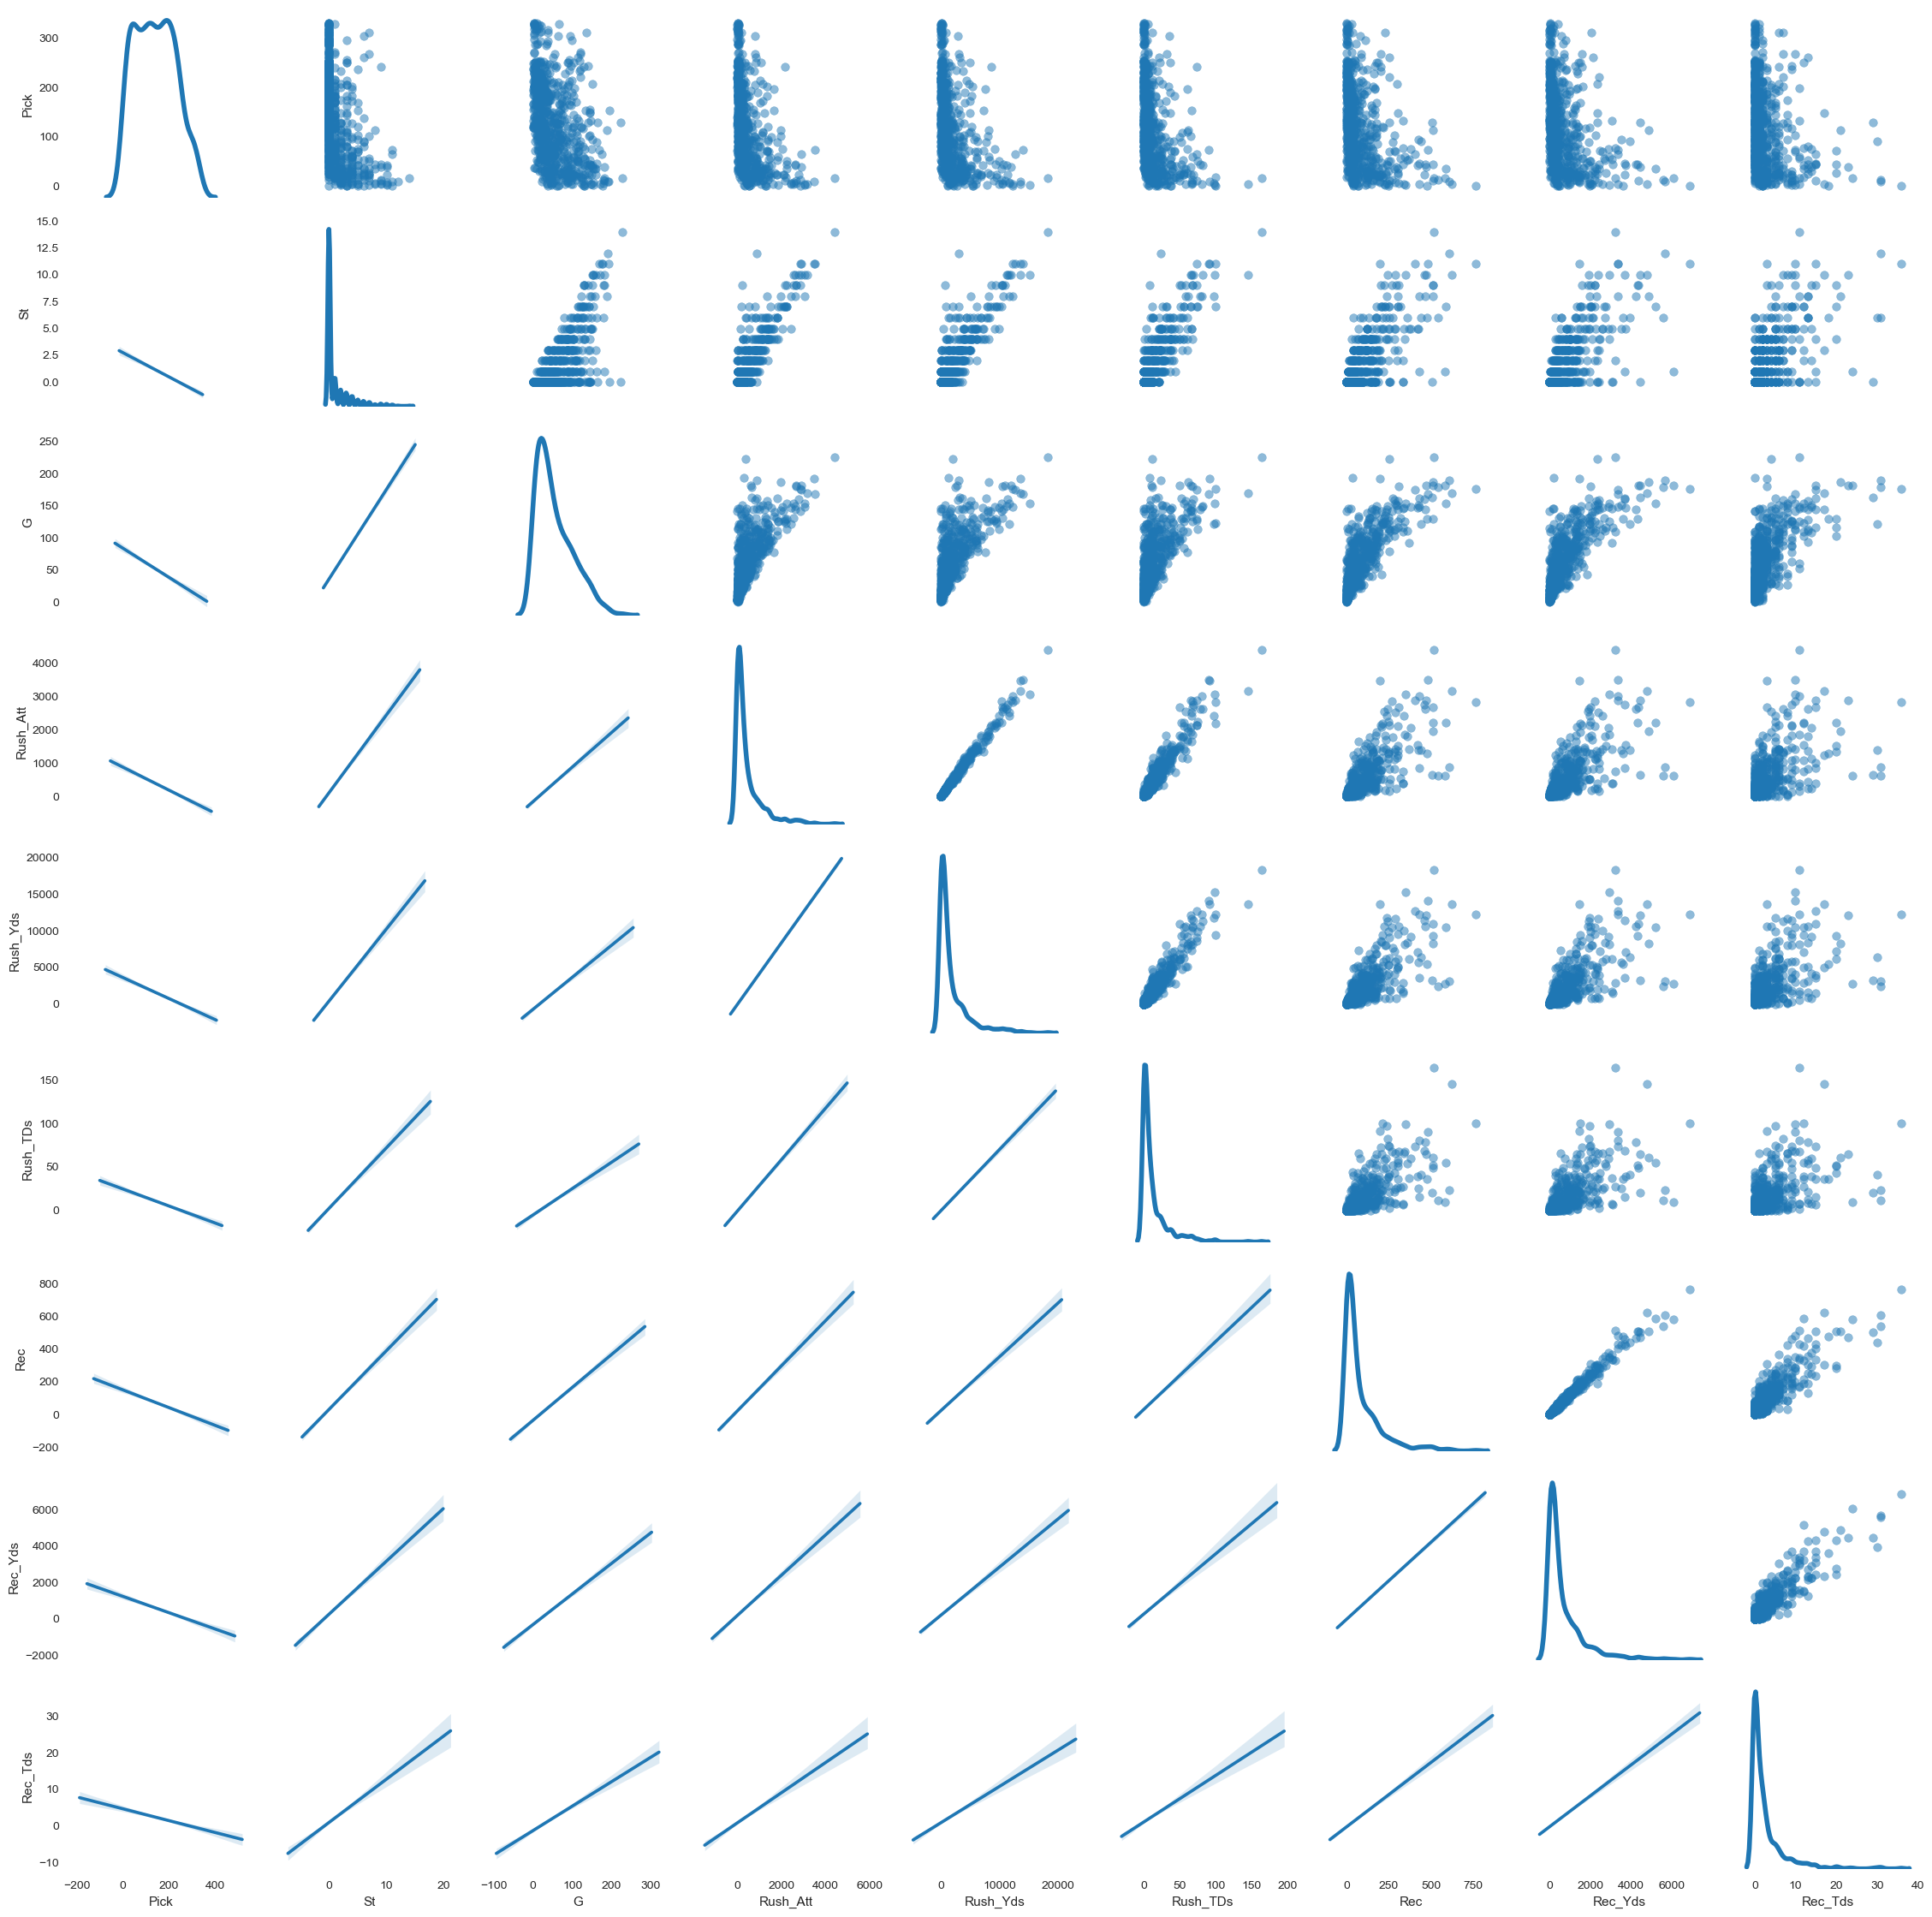

In [6]:
# Creating DF with just continuous variables
df_rb_cont = df_rb.loc[:, ['Pick', 'St', 'G', 'Rush_Att', 'Rush_Yds', 'Rush_TDs', 'Rec', 'Rec_Yds', 'Rec_Tds']]

# Making a pair plot with the continuous data
sns.set_style('white')

g = sns.PairGrid(df_rb_cont, diag_sharey=False)
g.map_upper(plt.scatter, alpha=.5)
g.map_lower(sns.regplot, scatter_kws=dict(alpha=0))
g.map_diag(sns.kdeplot, lw=4)
plt.show()

# Potential features

 - Avg rush yds per attempt
 - Avg rush yds per game
 - Avg rush TDs per game
 - Avg rec yds per game
 - Career length
 - Rush yards per season
 - Rush TDs per season
 - Career percentage was primary starter
 - Career percentage was invited to Pro Bowl
 - Rec/Rush percentage
 - SEC or other conference affiliation

In [7]:
# Average rushing yards per attempt
df_rb['AvgRushYdAtt'] = df_rb['Rush_Yds'] / df_rb['Rush_Att']

# Average rushing yards per game
df_rb['AvgRushYdG'] = df_rb['Rush_Yds'] / df_rb['G']

# Average rushing TD's per game
df_rb['AvgRushTdG'] = df_rb['Rush_TDs'] / df_rb['G']

# Average receiving yards per game
df_rb['AvgRecYdG'] = df_rb['Rec_Yds'] / df_rb['G']

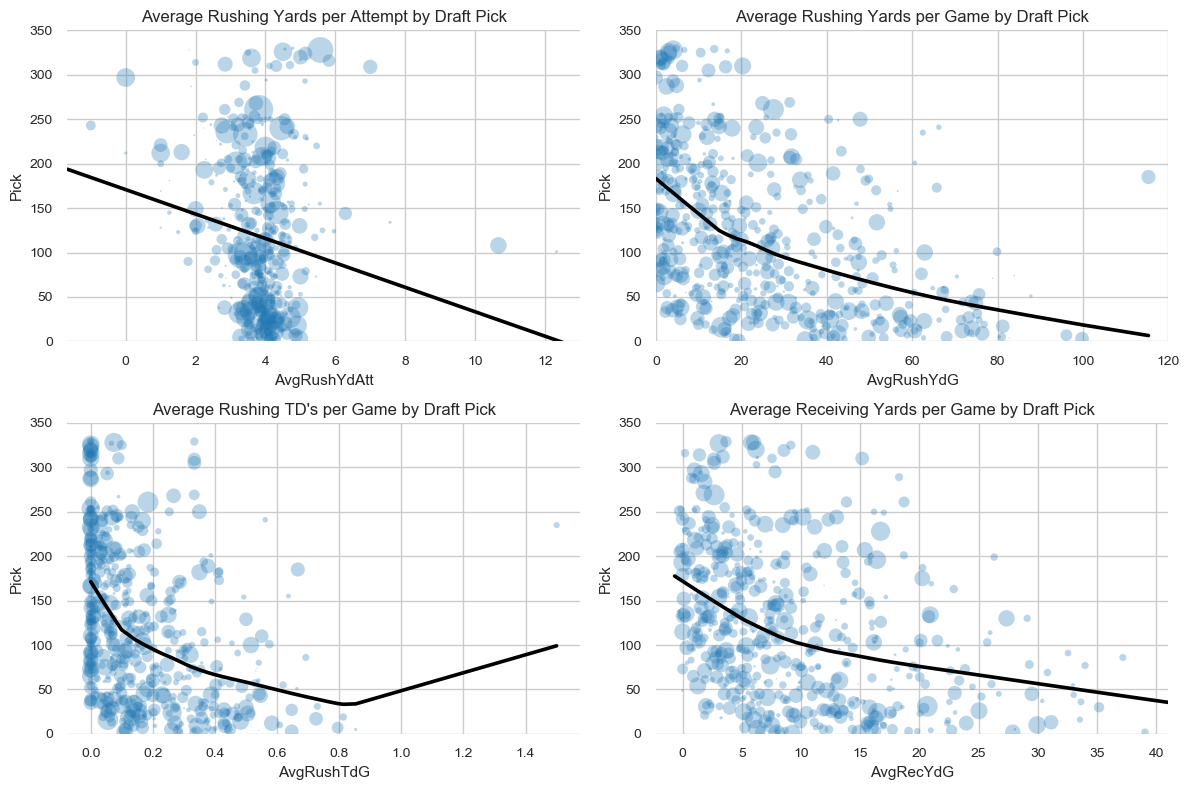

In [8]:
sns.set_style('whitegrid')
plt.figure(figsize=(12,8))

plt.subplot(2,2,1)
sns.regplot(x='AvgRushYdAtt', 
            y='Pick', 
            data=df_rb, 
            ci=None, 
            robust=True, 
            line_kws={'color':'k'},
            scatter_kws={'s':df_rb['Rush_Att']/10, 'alpha':.3},
           )
plt.title('Average Rushing Yards per Attempt by Draft Pick')
plt.ylim(0,350)

plt.subplot(2,2,2)
sns.regplot(x='AvgRushYdG', 
            y='Pick', 
            data=df_rb, 
            ci=None, 
            lowess=True, 
            line_kws={'color':'k'},
            scatter_kws={'s':df_rb['G'], 'alpha':.3}
           )
plt.title('Average Rushing Yards per Game by Draft Pick')
plt.xlim(0,120)
plt.ylim(0,350)

plt.subplot(2,2,3)
sns.regplot(x='AvgRushTdG', 
            y='Pick', 
            data=df_rb, 
            ci=None, 
            lowess=True, 
            line_kws={'color':'k'},
            scatter_kws={'s':df_rb['G'], 'alpha':.3}
           )
plt.title('Average Rushing TD\'s per Game by Draft Pick')
plt.ylim(0,350)

plt.subplot(2,2,4)
sns.regplot(x='AvgRecYdG', 
            y='Pick', 
            data=df_rb, 
            ci=None, 
            lowess=True, 
            line_kws={'color':'k'},
            scatter_kws={'s':df_rb['G'], 'alpha':.3}
           )
plt.title('Average Receiving Yards per Game by Draft Pick')
plt.ylim(0,350)
plt.tight_layout()
plt.show()          

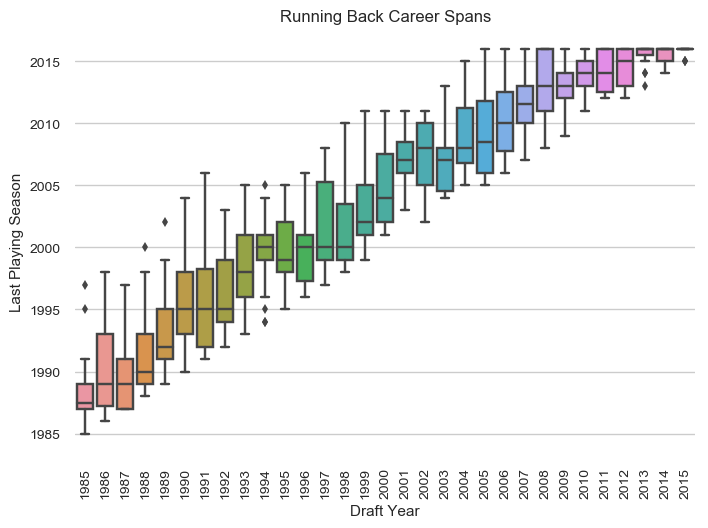

In [9]:
# Investigating career length

sns.boxplot(x='Year', y='To', data=df_rb)
plt.xticks(rotation='vertical')
plt.title('Running Back Career Spans')
plt.xlabel('Draft Year')
plt.ylabel('Last Playing Season')
plt.show()

In [10]:
# Creating a still active categorical where 1 == still active
df_rb['StillActive'] = np.where((df_rb['To'] == 2016), 1, 0)

# Calculating career length
df_rb['CareerLen'] = df_rb['To'] - df_rb['Year']

In [11]:
# Average yards per year
df_rb['AvgYdsYr'] = df_rb['Rush_Yds'] / df_rb['CareerLen']

# Average TDs per year
df_rb['AvgTdsYr'] = df_rb['Rush_TDs'] / df_rb['CareerLen']

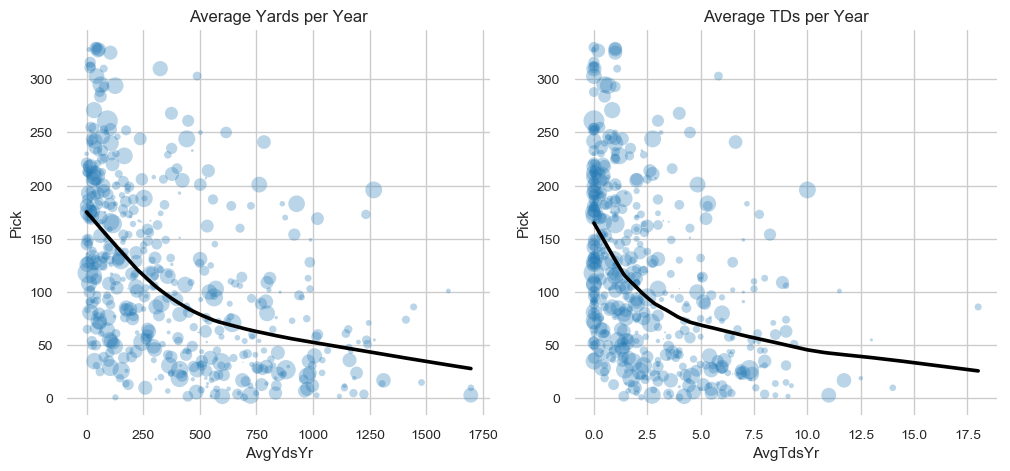

In [39]:
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
sns.regplot(x='AvgYdsYr', 
            y='Pick', 
            data=df_rb, 
            ci=None, 
            lowess=True, 
            line_kws={'color':'k'},
            scatter_kws={'s':df_rb['G'], 'alpha':.3})
plt.title('Average Yards per Year')

plt.subplot(1,2,2)
sns.regplot(x='AvgTdsYr', 
            y='Pick', 
            data=df_rb, 
            ci=None, 
            lowess=True, 
            line_kws={'color':'k'},
            scatter_kws={'s':df_rb['G'], 'alpha':.3})
plt.title('Average TDs per Year')
plt.show()

- Career percentage was primary starter
- Career percentage was invited to Pro Bowl
- Rec/Rush percentage
- SEC or other conference affiliation

In [13]:
# Career percentage as a primary starter
df_rb['PctPriSt'] = df_rb['St'] / df_rb['CareerLen']

# Career percentage as a pro bowler
df_rb['PctPB'] = df_rb['PB'] / df_rb['CareerLen']

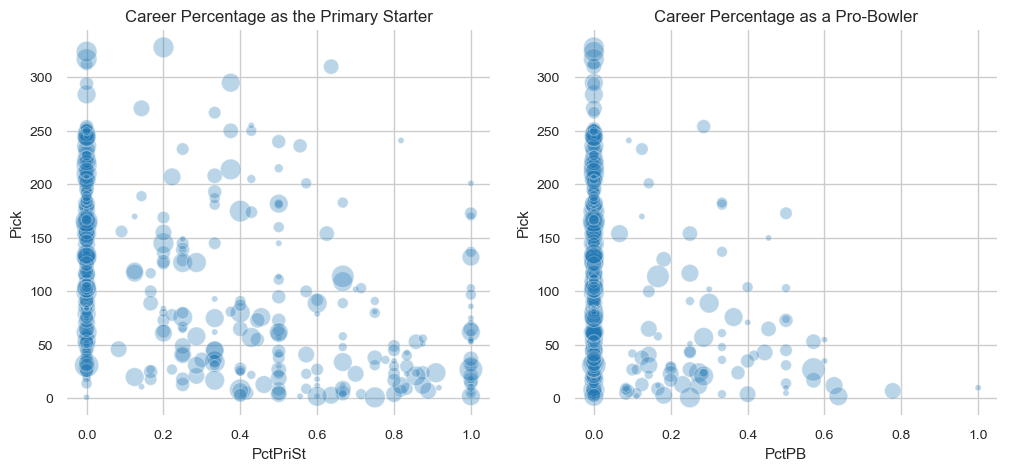

In [14]:
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
sns.scatterplot(x='PctPriSt', 
            y='Pick', 
            data=df_rb,
            s=df_rb['CareerLen']*20, 
            alpha=.3)
plt.xlim(-.05,1.05)
plt.title('Career Percentage as the Primary Starter')

plt.subplot(1,2,2)
sns.scatterplot(x='PctPB', 
            y='Pick', 
            data=df_rb,
            s=df_rb['CareerLen']*20, 
            alpha=.3)
plt.xlim(-.05,1.05)
plt.title('Career Percentage as a Pro-Bowler')
plt.show()

In [15]:
# Making categories for the PctPriSt & PctPB features
df_rb['PctPriSt_Cat'] = '0'
df_rb.loc[((df_rb['PctPriSt'] >= 0) & (df_rb['PctPriSt'] < 0.5)), 'PctPriSt_Cat'] = '0 - 0.49'
df_rb.loc[((df_rb['PctPriSt'] >= 0.5) & (df_rb['PctPriSt'] < 0.95)), 'PctPriSt_Cat'] = '0.5 - 0.94'
df_rb.loc[(df_rb['PctPriSt'] >= 0.95), 'PctPriSt_Cat'] = '>0.95'

df_rb['PctPB_Cat'] = '0'
df_rb.loc[((df_rb['PctPB'] > 0) & (df_rb['PctPriSt'] < 0.33)), 'PctPB_Cat'] = '0 - 0.33'
df_rb.loc[(df_rb['PctPB'] >= 0.33), 'PctPB_Cat'] = '>0.33'

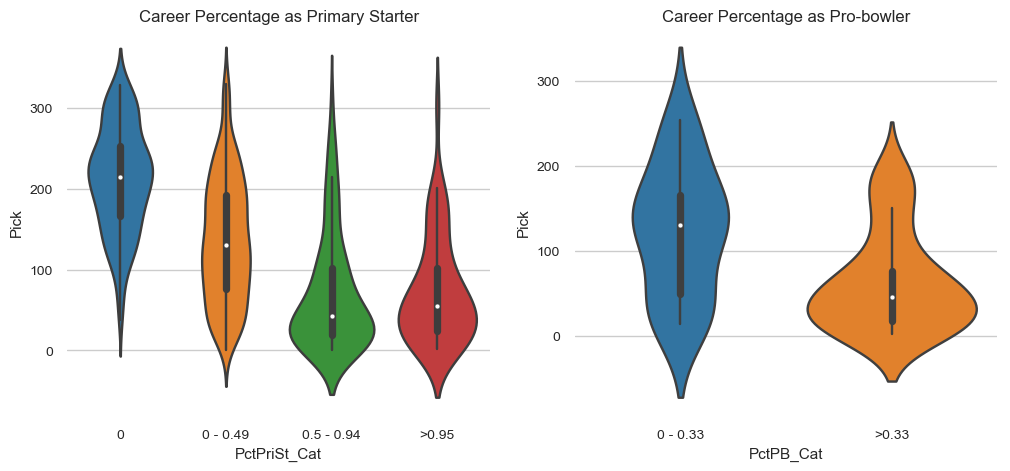

In [16]:
# Violin plots of categorical Percent Primary Starter and Percent Probowler
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
sns.violinplot(x='PctPriSt_Cat',
              y='Pick',
              data=df_rb,
              order=('0', '0 - 0.49', '0.5 - 0.94', '>0.95'))
plt.title('Career Percentage as Primary Starter')

plt.subplot(1,2,2)
sns.violinplot(x='PctPB_Cat',
              y='Pick',
              data=df_rb,
              order=('0 - 0.33', '>0.33'))
plt.title('Career Percentage as Pro-bowler')
plt.show()

In [17]:
# Career Reception/RushingAtt percentage
df_rb['RecRushPct'] = df_rb['Rec'] / df_rb['Rush_Att']

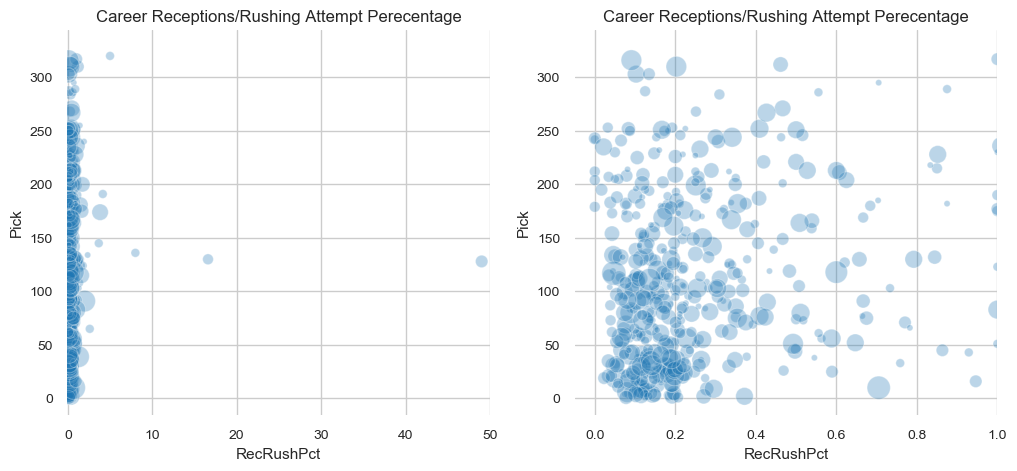

In [18]:
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
sns.scatterplot(x='RecRushPct', 
            y='Pick', 
            data=df_rb,
            s=df_rb['CareerLen']*20, 
            alpha=.3)
plt.xlim(-.05,50)
plt.title('Career Receptions/Rushing Attempt Perecentage')

plt.subplot(1,2,2)
sns.scatterplot(x='RecRushPct', 
            y='Pick', 
            data=df_rb,
            s=df_rb['CareerLen']*20, 
            alpha=.3)
plt.xlim(-.05,1)
plt.title('Career Receptions/Rushing Attempt Perecentage')
plt.show()

In [19]:
# Categorizing players by Conference affiliation

SEC = ['Florida', 'Georgia', 'Kentucky', 'Missouri', 'South Carolina', 'Tennessee', 'Vanderbilt', 
       'Alabama', 'Arkansas', 'Auburn', 'LSU', 'Mississippi', 'Mississippi St.', 'Texas A&M']

B10 = ['Indiana', 'Maryland', 'Michigan', 'Michigan St.', 'Ohio St.', 'Penn St.', 'Rutgers',
       'Illinois', 'Iowa', 'Minnesota', 'Nebraska', 'Northwestern', 'Purdue', 'Wisconsin']

B12 = ['Baylor', 'Iowa St.', 'Kansas', 'Kansas St.', 'Oklahoma', 'Oklahoma St.', 
       'TCU', 'Texas', 'Texas Tech', 'West Virginia']

P12 = ['Arizona', 'Arizona St.', 'California', 'UCLA', 'Colorado', 'Oregon', 'Oregon St.', 
       'USC', 'Stanford', 'Utah', 'Washington', 'Washington St.']

ACC = ['Boston College', 'Clemson', 'Duke', 'Florida St.', 'Georgia Tech', 'Louisville', 'Miami', 
       'North Carolina', 'North Carolina St.', 'Pittsburgh', 'Syracuse', 'Virginia', 
       'Virginia Tech', 'Wake Forest', 'Notre Dame']

Power5 = ['Florida', 'Georgia', 'Kentucky', 'Missouri', 'South Carolina', 'Tennessee', 'Vanderbilt', 
          'Alabama', 'Arkansas', 'Auburn', 'LSU', 'Mississippi', 'Mississippi St.', 'Texas A&M', 
          'Indiana', 'Maryland', 'Michigan', 'Michigan St.', 'Ohio St.', 'Penn St.', 'Rutgers',
          'Illinois', 'Iowa', 'Minnesota', 'Nebraska', 'Northwestern', 'Purdue', 'Wisconsin', 
          'Baylor', 'Iowa St.', 'Kansas', 'Kansas St.', 'Oklahoma', 'Oklahoma St.', 
          'TCU', 'Texas', 'Texas Tech', 'West Virginia', 'Arizona', 'Arizona St.', 'California', 
          'UCLA', 'Colorado', 'Oregon', 'Oregon St.', 'USC', 'Stanford', 'Utah', 'Washington', 
          'Washington St.', 'Boston College', 'Clemson', 'Duke', 'Florida St.', 'Georgia Tech', 
          'Louisville', 'Miami', 'North Carolina', 'North Carolina St.', 'Pittsburgh', 'Syracuse', 
          'Virginia', 'Virginia Tech', 'Wake Forest', 'Notre Dame']

# Creating one-hot encoding columns for each
df_rb['SEC'] = np.where((np.isin(df_rb['College/Univ'], SEC)), 1, 0)
df_rb['B10'] = np.where((np.isin(df_rb['College/Univ'], B10)), 1, 0)
df_rb['B12'] = np.where((np.isin(df_rb['College/Univ'], B12)), 1, 0)
df_rb['P12'] = np.where((np.isin(df_rb['College/Univ'], P12)), 1, 0)
df_rb['ACC'] = np.where((np.isin(df_rb['College/Univ'], ACC)), 1, 0)

# Combined Power 5 conference column
df_rb['Power5'] = np.where((np.isin(df_rb['College/Univ'], Power5)), 1, 0)

# Creating a integer encoded Power 5 conference affiliation column for box plots
df_rb['Conference'] = 0
df_rb.loc[(df_rb['SEC'] == 1), 'Conference'] = 1
df_rb.loc[(df_rb['B10'] == 1), 'Conference'] = 2
df_rb.loc[(df_rb['B12'] == 1), 'Conference'] = 3
df_rb.loc[(df_rb['P12'] == 1), 'Conference'] = 4
df_rb.loc[(df_rb['ACC'] == 1), 'Conference'] = 5


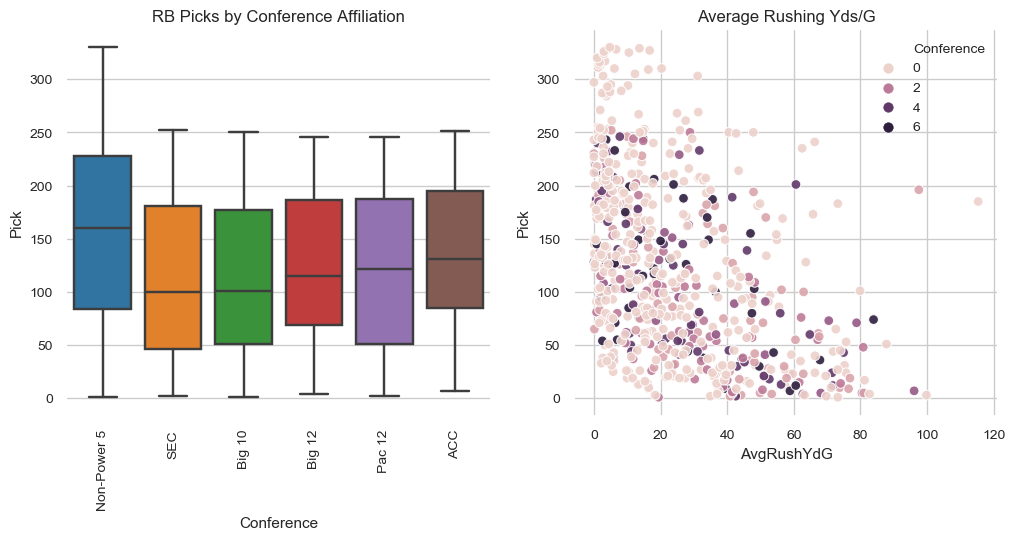

In [20]:
# Conference affiliation plots

plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
sns.boxplot(x='Conference', 
            y='Pick', 
            data=df_rb)
plt.title('RB Picks by Conference Affiliation')
plt.xlabel('Conference')
plt.xticks((0,1,2,3,4,5),('Non-Power 5', 'SEC', 'Big 10', 'Big 12', 'Pac 12', 'ACC'), rotation=90)

plt.subplot(1,2,2)
sns.scatterplot(x='AvgRushYdG', 
            y='Pick', 
            hue='Conference',
            data=df_rb,
            alpha=.9)
# plt.xlim(-.05,1)
plt.title('Average Rushing Yds/G')
plt.show()

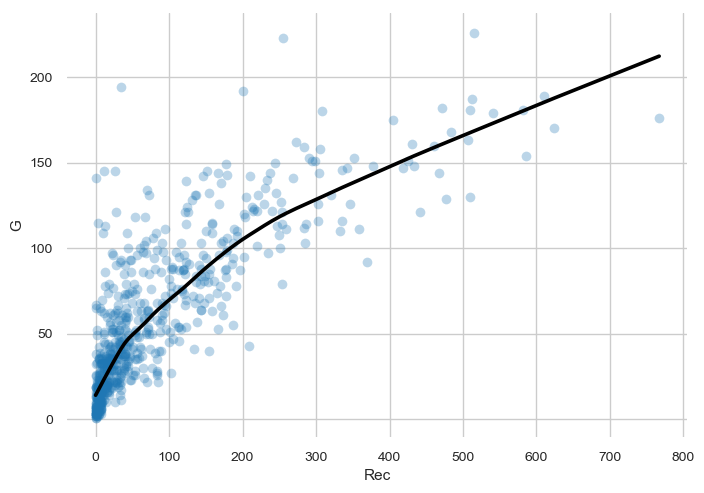

In [21]:
sns.regplot(x='Rec', 
            y='G', 
            data=df_rb, 
            ci=None, 
            lowess=True, 
            line_kws={'color':'k'},
            truncate=True,
            scatter_kws={'alpha':.3})
plt.show()

In [22]:
df_HOF = pd.read_csv('NFL_HOF.csv')
df_HOF.head()

,Rk,Player,Pos,Indct,From,To,AP1,PB,St,CarAV,...,Sk,Yds.1,Att.1,Yds.2,TD.1,Lng.1,Rec,Yds.3,TD.2,Lng.2
0,1,Jim Thorpe\ThorJi20,TB,1963,1920,1928,1,0,3,0,...,NaN,NaN,0.0,0.0,6.0,0.0,NaN,NaN,NaN,NaN
1,2,Pete Henry\HenrPe20,T,1963,1920,1928,4,0,7,0,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,1.0,0.0
2,3,George Trafton\TrafGe20,C,1964,1920,1932,2,0,9,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,Ed Healey\HealEd20,T,1964,1920,1927,4,0,7,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,Paddy Driscoll\DrisPa20,HB,1965,1920,1929,6,0,9,0,...,NaN,NaN,0.0,0.0,25.0,0.0,0.0,0.0,4.0,0.0


In [23]:
df_HOF['PID'] = df_HOF['Player'].str[-8:]
df_HOF['HOF'] = 1
df_HOF_RB = df_HOF[['PID', 'HOF']]

In [24]:
df_rb = pd.merge(df_rb, df_HOF_RB, how='left', left_on='Player_Id', right_on='PID')
df_rb

,Player_Id,Year,Rnd,Pick,Tm,Player,Position Standard,First4AV,Age,To,...,RecRushPct,SEC,B10,B12,P12,ACC,Power5,Conference,PID,HOF
0,GurlTo01,2015,1.0,10,STL,Todd Gurley,RB,8,21.0,2016.0,...,0.112981,1,0,0,0,0,1,1,NaN,NaN
1,GordMe00,2015,1.0,15,SDG,Melvin Gordon,RB,5,22.0,2016.0,...,0.164589,0,1,0,0,0,1,2,NaN,NaN
2,YeldT.00,2015,2.0,36,JAX,T.J. Yeldon,RB,0,21.0,2016.0,...,0.264151,1,0,0,0,0,1,1,NaN,NaN
3,AbduAm00,2015,2.0,54,DET,Ameer Abdullah,RB,5,22.0,2016.0,...,0.186335,0,1,0,0,0,1,2,NaN,NaN
4,ColeTe01,2015,3.0,73,ATL,Tevin Coleman,RB,3,22.0,2016.0,...,0.143836,0,1,0,0,0,1,2,NaN,NaN
5,JohnDu00,2015,3.0,77,CLE,Duke Johnson,RB,5,22.0,2016.0,...,0.664516,0,0,0,0,0,0,0,NaN,NaN
6,JohnDa08,2015,3.0,86,ARI,David Johnson,RB,9,23.0,2016.0,...,0.257764,0,0,0,0,0,0,0,NaN,NaN
7,JoneMa04,2015,3.0,95,WAS,Matt Jones,RB,6,22.0,2016.0,...,0.111111,1,0,0,0,0,1,1,NaN,NaN
8,LangJe00,2015,4.0,106,CHI,Jeremy Langford,RB,6,23.0,2016.0,...,0.187166,0,1,0,0,0,1,2,NaN,NaN
9,AlleJa01,2015,4.0,125,BAL,Javorius Allen,RB,5,24.0,2016.0,...,0.328767,0,0,0,1,0,1,4,NaN,NaN


In [25]:
df_rb['HOF'] = np.where(df_rb['HOF'] == 1, 1, 0)

In [28]:
df_rb.loc[df_rb['HOF'] == 1]

,Player_Id,Year,Rnd,Pick,Tm,Player,Position Standard,First4AV,Age,To,...,RecRushPct,SEC,B10,B12,P12,ACC,Power5,Conference,PID,HOF
288,TomlLa00,2001,1.0,5,SDG,LaDainian Tomlinson,RB,80,22.0,2011.0,...,0.196597,0,0,1,0,0,1,3,TomlLa00,1
424,MartCu00,1995,3.0,74,NWE,Curtis Martin HOF,RB,63,22.0,2005.0,...,0.137578,0,0,0,0,1,1,5,MartCu00,1
433,DaviTe00,1995,6.0,196,DEN,Terrell Davis,RB,70,22.0,2001.0,...,0.102115,1,0,0,0,0,1,1,DaviTe00,1
437,FaulMa00,1994,1.0,2,IND,Marshall Faulk HOF,RB,68,21.0,2005.0,...,0.270451,0,0,0,0,0,0,0,FaulMa00,1
464,BettJe00,1993,NaN,10,RAM,Jerome Bettis HOF,RB,35,21.0,2005.0,...,0.057488,0,0,0,0,0,0,0,BettJe00,1
550,SmitEm00,1990,1.0,17,DAL,Emmitt Smith HOF,RB,82,21.0,2004.0,...,0.116807,0,0,0,0,0,0,0,SmitEm00,1
588,SandBa00,1989,1.0,3,DET,Barry Sanders HOF,RB,68,21.0,1998.0,...,0.114958,0,0,0,0,0,0,0,SandBa00,1
641,ThomTh00,1988,2.0,40,BUF,Thurman Thomas HOF,RB,84,22.0,2000.0,...,0.164060,0,0,0,0,0,0,0,ThomTh00,1
